## Data visualization and data manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Pandas DataFrames
'''

# Read iris dataset from UCI database
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Get info of the data
print(df.info())
print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None



In [3]:
# Get statistical summary of the data
print(df.describe())
print('')

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



In [4]:
# Look at first 10 rows of the data
print(df.head(10))
print('')

# Select rows with sepal_length more than 5.0
df2 = df.loc[df['sepal_length'] > 5.0, ]

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa



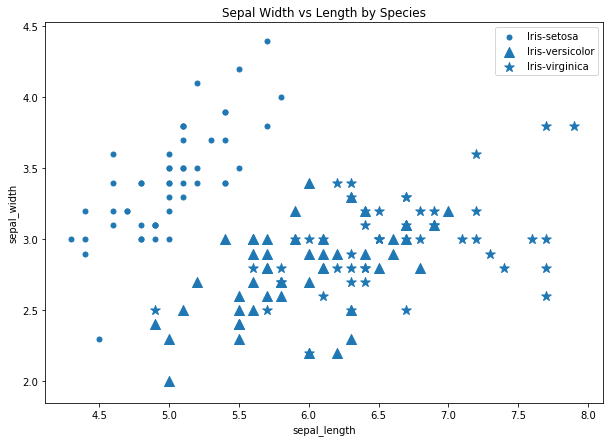

<Figure size 432x288 with 0 Axes>

In [5]:
'''
Data Visualization in Panads
'''

# Define marker shapes by class
marker_shapes = ['.', '^', '*']

# Then, plot the scatterplot
for i, species in enumerate(df['class'].unique()):
  if i == 0:
    ax = df[df['class'] == species].plot.scatter(x='sepal_length', y='sepal_width', marker=marker_shapes[i], s=100,title="Sepal Width vs Length by Species", label=species, figsize=(10,7))
  else:
    df[df['class'] == species].plot.scatter(x='sepal_length', y='sepal_width', marker=marker_shapes[i], s=100, title="Sepal Width vs Length by Species", label=species, ax=ax)
plt.show()
plt.clf()

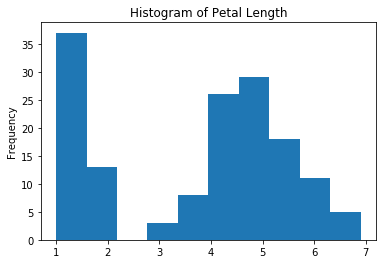

In [6]:
# Plot histogram
df['petal_length'].plot.hist(title='Histogram of Petal Length')
plt.show()

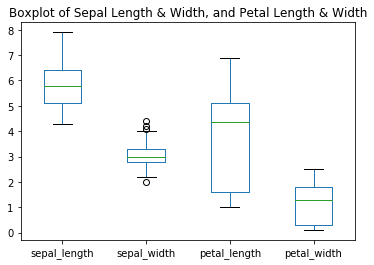

In [7]:
# Plot boxplot
df.plot.box(title='Boxplot of Sepal Length & Width, and Petal Length & Width')
plt.show()

In [8]:
'''
Data Preprocessing in Pandas
'''

# Encode categorical variables
df2 = pd.DataFrame({'Day': ['Monday','Tuesday','Wednesday',
                           'Thursday','Friday','Saturday',
                           'Sunday']})
                           
# One-hot-encode
print(pd.get_dummies(df2))
print('')

   Day_Friday  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0           0           1             0           0             0   
1           0           0             0           0             0   
2           0           0             0           0             0   
3           0           0             0           0             1   
4           1           0             0           0             0   
5           0           0             1           0             0   
6           0           0             0           1             0   

   Day_Tuesday  Day_Wednesday  
0            0              0  
1            1              0  
2            0              1  
3            0              0  
4            0              0  
5            0              0  
6            0              0  



In [9]:
# Imputing missing values
# Import the iris data once again
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Randomly select 10 rows
random_index = np.random.choice(df.index, replace= False, size=10)

# Set the sepal_length values of these rows to be None
df.loc[random_index,'sepal_length'] = None

# Check where the missing values are
print(df.isnull().any())
print('')

sepal_length     True
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool



In [10]:
# Drop missing values
print("Number of rows before deleting: %d" % (df.shape[0]))
df2 = df.dropna()
print("Number of rows after deleting: %d" % (df2.shape[0]))
print('')

Number of rows before deleting: 150
Number of rows after deleting: 140



In [11]:
# Replace missing values with the mean
df.sepal_length = df.sepal_length.fillna(df.sepal_length.mean())

# Confirm that there are no missing values left
print(df.isnull().any())
print('')

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

